In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [22]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,NaN,0.0,NaN,2,2,...,NaN,0,0.0,0,NaN,0.0,NaN,0,NaN,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2.0,0.0,2,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,NaN,NaN,0.0,2,0,...,NaN,0,NaN,3,NaN,2.0,NaN,2,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,NaN,NaN,NaN,3,2,...,NaN,0,0.0,0,NaN,NaN,0.0,1,NaN,70
355,2,2,2,1,0,0.0,0.0,NaN,0,0,...,NaN,0,NaN,2,NaN,0.0,NaN,2,NaN,70
356,2,1,0,3,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [23]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	9
float64		column 7	6
float64		column 8	9
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	9
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
float64		column 20	3
int64		column 21	0
float64		column 22	6
int64		column 23	0
int64		column 24	0
float64		column 25	12
int64		column 26	0
float64		column 27	6
int64		column 28	0
float64		column 29	12
float64		column 30	3
float64		column 31	9
int64		column 32	0
float64		column 33	12
int64		column 34	0


In [24]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,349.000000,352.000000,349.000000,358.000000,358.000000,...,346.000000,358.000000,352.000000,358.000000,346.000000,355.000000,349.000000,358.000000,346.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.461318,0.167614,0.389685,0.622905,0.530726,...,0.413295,0.474860,0.468750,0.949721,0.473988,0.107042,0.114613,1.877095,0.572254,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.965984,0.572670,0.845887,0.990278,0.912352,...,0.867946,0.871705,0.966175,1.129060,0.972470,0.457000,0.489591,0.699324,1.119904,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

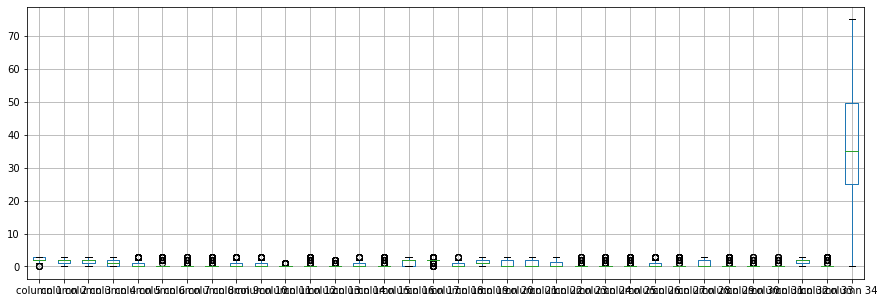

In [25]:
df.boxplot(return_type='axes', figsize=(15,5))

In [26]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.461318
column 7      0.167614
column 8      0.389685
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.421203
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.661972
column 21     0.983240
column 22     0.639205
column 23     0.298883
column 24     0.368715
column 25     0.413295
column 26     0.474860
column 27     0.468750
column 28     0.949721
column 29     0.473988
column 30     0.107042
column 31     0.114613
column 32     1.877095
column 33     0.572254
column 34    36.296089
dtype: float64

In [27]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.031527,-0.113640,-0.033421,0.138519,0.180740,...,-0.018843,0.153229,-0.002894,0.038837,-0.010433,-0.007290,0.006983,0.093026,-0.003425,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.072784,-0.100005,-0.084877,0.294258,0.295932,...,-0.089729,0.205046,-0.113321,0.023095,-0.117689,-0.012386,-0.020244,-0.008453,-0.129127,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.326070,-0.172060,0.285762,0.301187,0.261495,...,0.291716,0.350007,0.296093,-0.252643,0.274017,-0.092431,-0.127575,0.124812,0.285883,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.411489,-0.138983,0.360014,-0.296824,-0.152562,...,0.366000,-0.190548,0.367830,0.003028,0.376511,-0.177994,-0.182249,0.051553,0.388533,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.391108,-0.172224,0.390770,-0.065438,0.013496,...,0.401884,0.002588,0.371421,0.006726,0.379920,-0.150205,-0.165251,0.110295,0.378454,0.081162
column 6,0.031527,-0.072784,0.326070,0.411489,0.391108,1.000000,-0.140830,0.862252,-0.278237,-0.257350,...,0.883666,-0.124216,0.910900,0.090621,0.893948,-0.096689,-0.113230,0.259274,0.907591,0.097892
column 7,-0.113640,-0.100005,-0.172060,-0.138983,-0.172224,-0.140830,1.000000,-0.137208,0.218693,0.002725,...,-0.123726,-0.158497,-0.143828,-0.031552,-0.144411,0.777669,0.839475,-0.098929,-0.137944,-0.365071
column 8,-0.033421,-0.084877,0.285762,0.360014,0.390770,0.862252,-0.137208,1.000000,-0.286217,-0.265643,...,0.884458,-0.111251,0.885380,0.128517,0.872781,-0.087069,-0.109220,0.277153,0.893991,0.116834
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278237,0.218693,-0.286217,1.000000,0.659286,...,-0.271560,0.480594,-0.287766,-0.417851,-0.284157,0.238712,0.251464,-0.079246,-0.287944,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.257350,0.002725,-0.265643,0.659286,1.000000,...,-0.263544,0.485260,-0.262213,-0.425421,-0.264622,-0.052127,-0.015566,0.027887,-0.266084,0.036412


In [28]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [29]:
imputer = md.Midas(layer_structure = [34,34+9,34+9+9,34+9+9+9,34+9+9+9+9,34+9+9+9+9+9,34+9+9+9+9+9+9,34+9+9+9+9+9+9+9,34+9+9+9+9+9+9,34+9+9+9+9+9,34+9+9+9+9,34+9+9+9,34+9+9,34+9,34], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.48264555497603
Epoch: 1 , loss: 76.38544914939187
Epoch: 2 , loss: 76.4157055941495
Epoch: 3 , loss: 76.2726225419478
Epoch: 4 , loss: 76.3687130321156
Epoch: 5 , loss: 76.03787127408114
Epoch: 6 , loss: 75.88602378151633
Epoch: 7 , loss: 75.86786929043856
Epoch: 8 , loss: 75.55800039117986
Epoch: 9 , loss: 74.83333882418546
Epoch: 10 , loss: 73.93667949329723
Epoch: 11 , loss: 72.01483223655008
Epoch: 12 , loss: 69.54854202270508
Epoch: 13 , loss: 68.58893463828348
Epoch: 14 , loss: 67.83468957380815
Epoch: 15 , loss: 67.79313416914506
Epoch: 16 , loss: 67.03498094732112
Epoch: 17 , loss: 66.45406636324796
Epoch: 18 , loss: 66.32427423650569
Epoch: 19 , loss: 65.7373534115878
Epoch: 20 , loss: 65.83247063376687
Epoch: 21 , loss: 65.68607243624601
Epoch: 22 , loss: 65.5791112726385
Epoch: 23 , loss: 65.37851801785555
Epoch: 24 , loss: 65.03012223677202
Epoch: 25 , loss: 65.23154570839621
Epoch: 26 ,

In [30]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [31]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [32]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [33]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.185428,0.000000,0.164417,0,0,...,0.168815,0,0.000000,0,0.193438,0.00000,0.000471,0,-1.774208,0
1,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.00000,0.000000,0,0.000000,0
2,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.00000,0.000000,0,0.000000,0
3,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.00000,0.000000,0,0.000000,0
4,0,0,0,0,0,0.223212,-1.978258,0.000000,0,0,...,0.202329,0,0.227208,0,0.231999,0.00000,-1.999125,0,0.271667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.00000,0.000000,0,0.000000,0
354,0,0,0,0,0,0.246610,0.020836,0.219401,0,0,...,0.224183,0,0.000000,0,0.256973,0.00101,0.000000,0,0.301923,0
355,0,0,0,0,0,0.000000,0.000000,0.247394,0,0,...,0.251528,0,0.282287,0,0.288604,0.00000,0.001722,0,0.336098,0
356,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.00000,0.000000,0,0.000000,0


Calculating NRMSE Value

In [34]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [35]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [36]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.341527228402461, 758.0725558942231)

In [37]:
NRMS=numerator/denominator
NRMS


0.007046195231407091

In [38]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [39]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.185428,0.000000,0.164417,2,2,...,0.168815,0,0.000000,0,0.193438,0.00000,0.000471,0,0.225792,0
1,1,1,2,0,0,0.000000,3.000000,0.000000,3,0,...,0.000000,0,0.000000,0,0.000000,2.00000,2.000000,2,0.000000,7
2,2,2,1,0,0,0.000000,3.000000,0.000000,2,0,...,0.000000,0,0.000000,2,0.000000,3.00000,3.000000,2,0.000000,7
3,2,2,2,1,0,0.000000,2.000000,0.000000,2,2,...,0.000000,0,0.000000,2,0.000000,2.00000,2.000000,2,0.000000,7
4,2,2,1,0,0,0.223212,0.021742,0.000000,2,0,...,0.202329,0,0.227208,3,0.231999,2.00000,0.000875,2,0.271667,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,3,0.000000,0.00000,0.000000,3,0.000000,70
354,2,3,2,0,0,0.246610,0.020836,0.219401,3,2,...,0.224183,0,0.000000,0,0.256973,0.00101,0.000000,1,0.301923,70
355,2,2,2,1,0,0.000000,0.000000,0.247394,0,0,...,0.251528,0,0.282287,2,0.288604,0.00000,0.001722,2,0.336098,70
356,2,1,0,3,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.00000,0.000000,1,0.000000,70


In [40]:
imputations[-1].to_excel("DERM_AL_1(imp).xlsx", index=False, header=False)